In [1]:
import  HeartRatePipeline
import PulseOxygenationPipeline
import  RespRateAndVolumePipeline
import FlowVolumeLoopsPipeline
from ventiliser.GeneralPipeline import GeneralPipeline
import  AsymmetryPipeline

# Needs to be edited by user:
# Define folder of the dataset
database_path = r"C:\Users\silas\Master Project\Meerkat Vital Sign Monitoring\dataset"

# Heart rate analysis

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


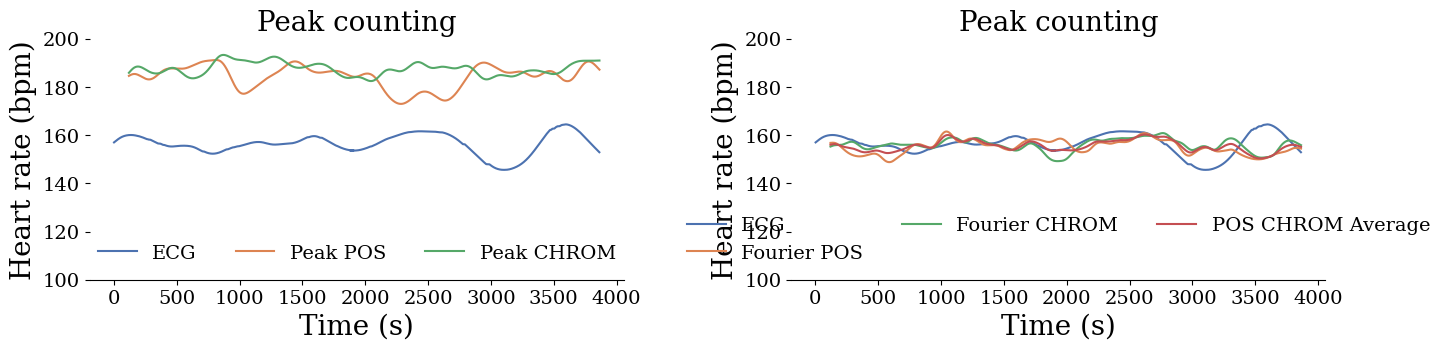

POS_Peak_counting analysis
Data points: 1754
Mean Absolute Difference (MAD): 28.1309
MAD as Percentage of Ground Truth Mean: 18.01%
MSE: 851.4113
CP 10%: 0.09236031927023945
CP 20%: 0.62884834663626
CHROM_Peak_counting analysis
Data points: 1754
Mean Absolute Difference (MAD): 31.3693
MAD as Percentage of Ground Truth Mean: 20.08%
MSE: 1000.8837
CP 10%: 0.0
CP 20%: 0.571835803876853
POS_Fourier_analysis analysis
Data points: 1754
Mean Absolute Difference (MAD): 4.0178
MAD as Percentage of Ground Truth Mean: 2.57%
MSE: 25.0371
CP 10%: 1.0
CP 20%: 1.0
CHROM_Fourier_analysis analysis
Data points: 1754
Mean Absolute Difference (MAD): 3.4821
MAD as Percentage of Ground Truth Mean: 2.23%
MSE: 21.8683
CP 10%: 1.0
CP 20%: 1.0
CHROM_POS analysis
Data points: 1754
Mean Absolute Difference (MAD): 3.4141
MAD as Percentage of Ground Truth Mean: 2.19%
MSE: 20.8667
CP 10%: 1.0
CP 20%: 1.0


In [5]:
hr = HeartRatePipeline.Calculate_heart_rate()
hr.data_analysis_folder = database_path
hr.run()
#7 for example

# Pulse oxygenation

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


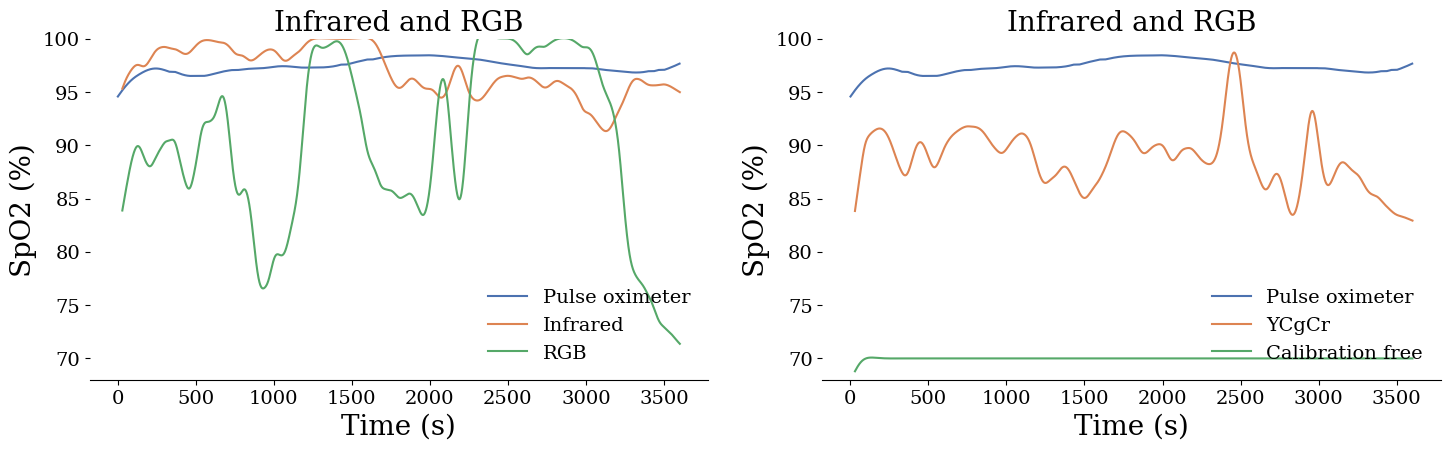

Ycgcr Oxygen Saturation Analysis
Mean Absolute Difference (MAD): nan
MAD as Percentage of Ground Truth Mean: nan%
MSE: nan
CP 3%: 0.03372243839169909
CP 6%: 0.15304798962386512
Infrared Oxygen Saturation Analysis
Mean Absolute Difference (MAD): nan
MAD as Percentage of Ground Truth Mean: nan%
MSE: nan
CP 3%: 0.7717250324254216
CP 6%: 0.9909208819714657
Rgb Oxygen Saturation Analysis
Mean Absolute Difference (MAD): nan
MAD as Percentage of Ground Truth Mean: nan%
MSE: nan
CP 3%: 0.3404669260700389
CP 6%: 0.4390402075226978
Calibration Free Oxygen Saturation Analysis


c:\Users\silas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\silas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 3552 but corresponding boolean dimension is 3555

In [3]:
ox = PulseOxygenationPipeline.CalculatePulseOxygenation()
ox.intervall_length = 900
ox.data_analysis_folder = database_path
ox.run()
# 5 for image

# Respiratory rate and tidal volume

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


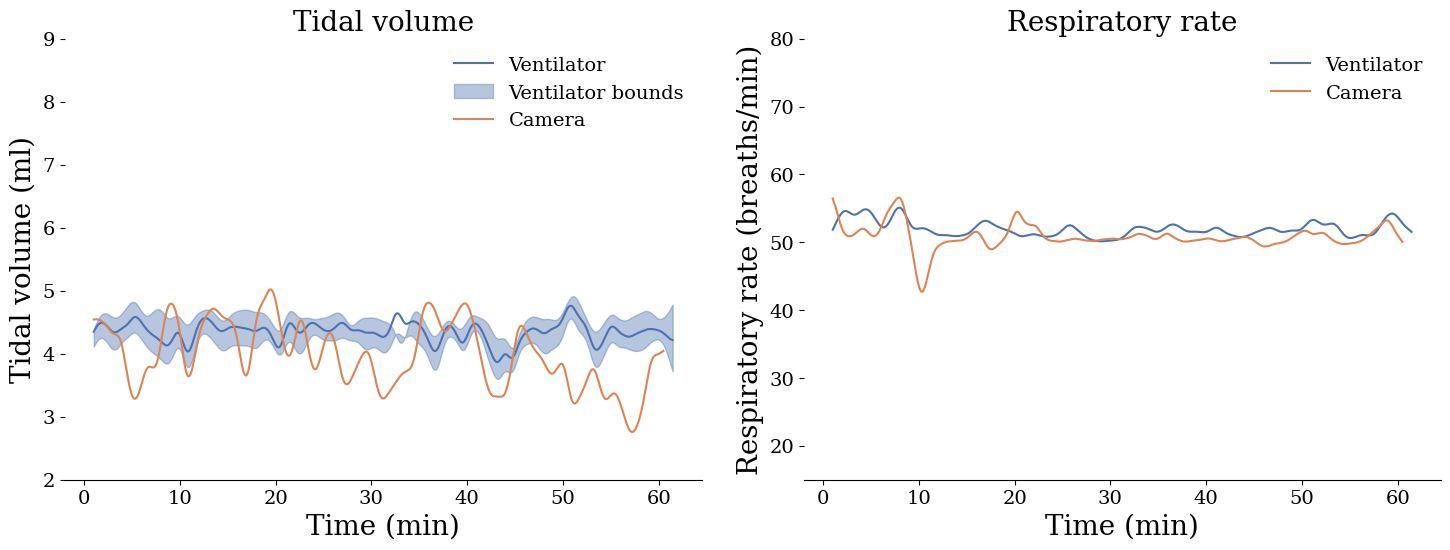

Resp Fourier
Mean Absolute Difference (MAD): 1.5831
MAD as Percentage of Ground Truth Mean: 3.05%
MSE: 4.5288
CP 10%: 0.9728062797869358
CP 20%: 1.0
Resp Peak Counting
Mean Absolute Difference (MAD): 20.6026
MAD as Percentage of Ground Truth Mean: 39.63%
MSE: 459.8366
CP 10%: 0.0
CP 20%: 0.00897112419400056
Tidal Volume
Mean Absolute Difference (MAD): 0.5343
MAD as Percentage of Ground Truth Mean: 12.28%
MSE: 0.4293
CP 10%: 0.4575273338940286
CP 20%: 0.8071208298289879
Tidal Volume Upper Lower


TypeError: only integer scalar arrays can be converted to a scalar index

In [2]:
Resp = RespRateAndVolumePipeline.Respiratory_rate_and_volume_pipeline()
Resp.data_analysis_folder = database_path
Resp.run()

# Flow-volume loops

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504
08/22 12:26 :        0 /   121284 (  0.00%): Labelling pressure states 
08/22 12:26 :   121284 /   121284 (100.00%): Labelling pressure states 
08/22 12:26 :        0 /   121284 (  0.00%): Labelling flow states 
08/22 12:26 :   121284 /   121284 (100.00%): Labelling flow states 
Segmenting into breaths
4761 breaths identified
08/22 12:26 :        0 /     4761 (  0.00%): Processing breaths 
08/22 12:26 :     4761 /     4761 (100.00%): Processing breaths 
08/22 12:26 :        0 /     4760 (  0.00%): Post-processing 
08/22 12:26 :     4760 /     4760 (100.00%): Post-processing 
08/22 12:26 :        0 /     4690 (  0.00%): Re-numbering breaths 
08/22 12:26 :     4690 /     4690 (100.00%): Re-numbering breaths 


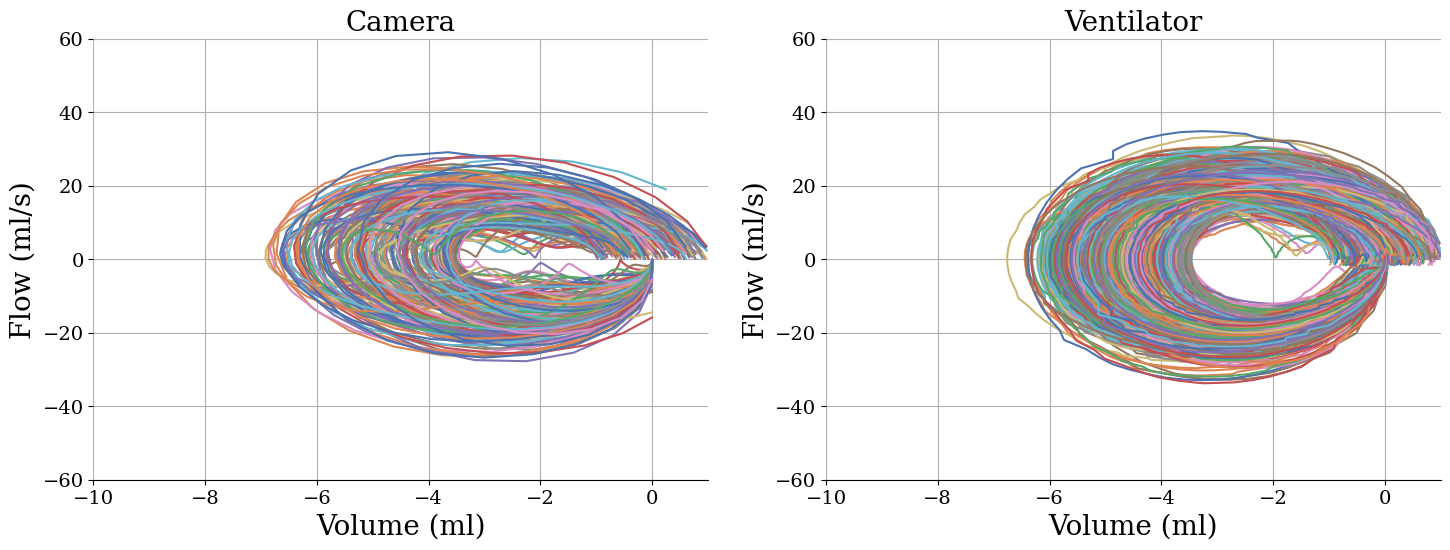

In [4]:
if __name__ == "__main__":#Required for ventiliser package
    fv = FlowVolumeLoopsPipeline.CalculateFlowVolumeLoop(data_analysis_folder=database_path, plot_single_loops_flag=False)
    intermediate_file, has_ventilator = fv.run_part1()

    # use ventiliser to calculate beginning and end of breaths using bandpass filtered data
    if has_ventilator:
        pipeline = GeneralPipeline()
        pipeline.configure()  # For information on parameters you can configure see docs
        pipeline.load_data(
            intermediate_file, [0, 1, 2]
        )  # [0,1,2] refers to the columns in your data file corresponding to time, pressure, flow

        pipeline.process()  # You can suppress log and output files by setting them false. See docs for more information

    fv.run_part2()  # intermediate_file, intermediate_folder, subject_file)
    
#5 is example
#3 as well
#13 for publication plot

# Asymmetry

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


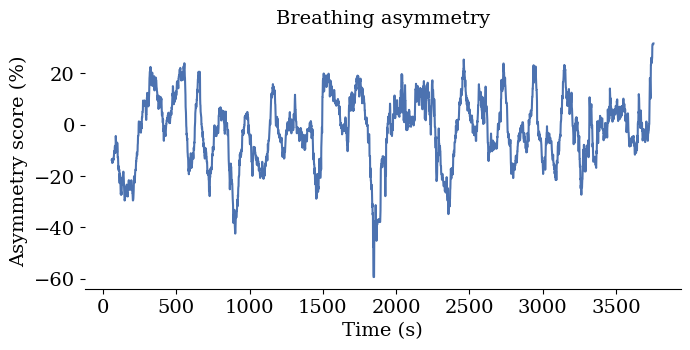

In [2]:
asym = AsymmetryPipeline.BreathingAsymmetry()
asym.data_analysis_folder = database_path
asym.run()
#mk047 has positive asymmetry
#mk026 is very balanced
#mk502 has large negative

# Summary statistics heart rate

Number of subjects:  11
CHROM_POS
CP 5 %: 0.5092006563525551
CP 10 %: 0.9292662916080637
MAD: 7.718274069869378
MAD: 5.04577444653411 %
MSE: 81.8384759057065


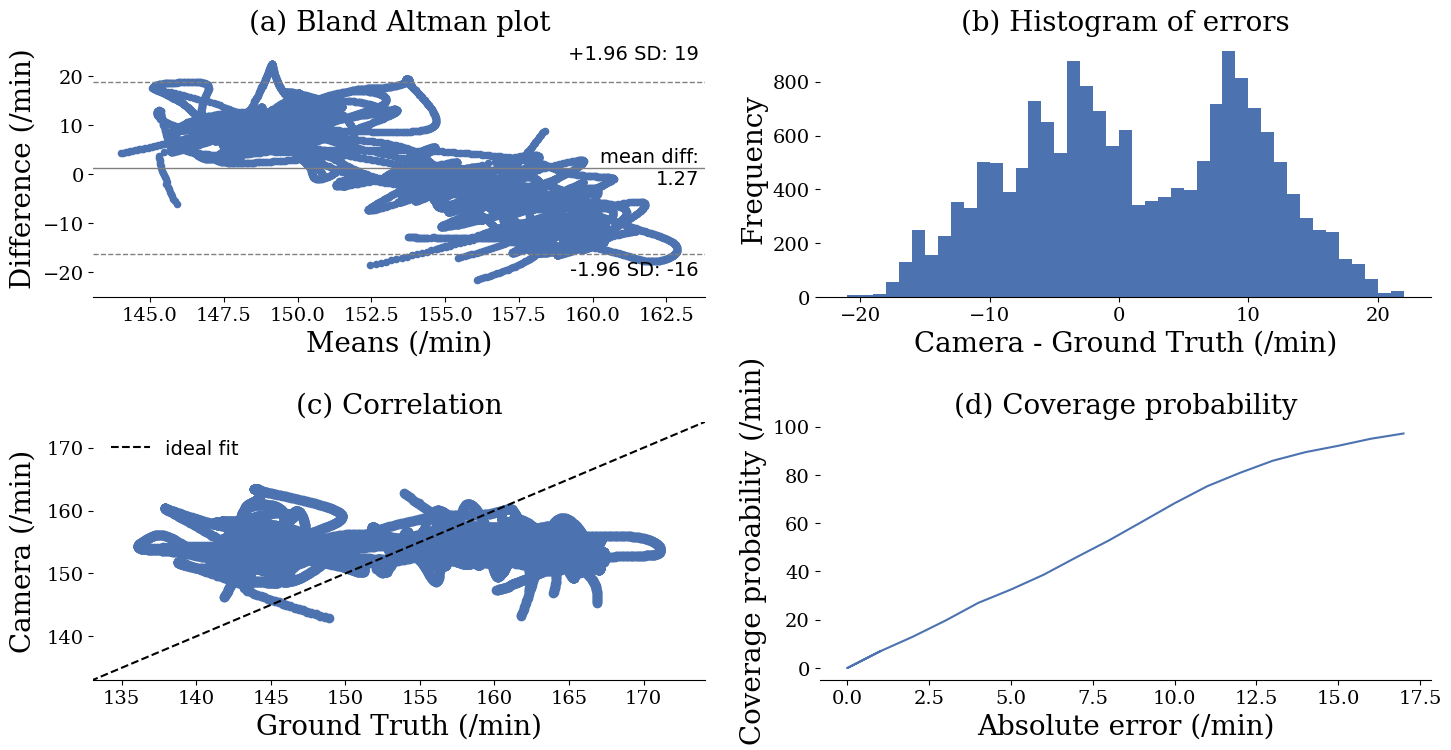

In [3]:
#SummaryStatistics.vital_sign_summary_statistics(database_path, "POS_Fourier_analysis")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_Fourier_analysis")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_Peak_counting")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "POS_Peak_counting")
SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_POS")

# Summary statistics oxygen saturaton

Number of subjects:  7
infrared_oxygen_saturation
CP 3 %: 0.5302678120262759
CP 6 %: 0.8424456796361799
MAD: 3.248080764184053
MAD: 3.439633618233378 %
MSE: 15.874432332838207


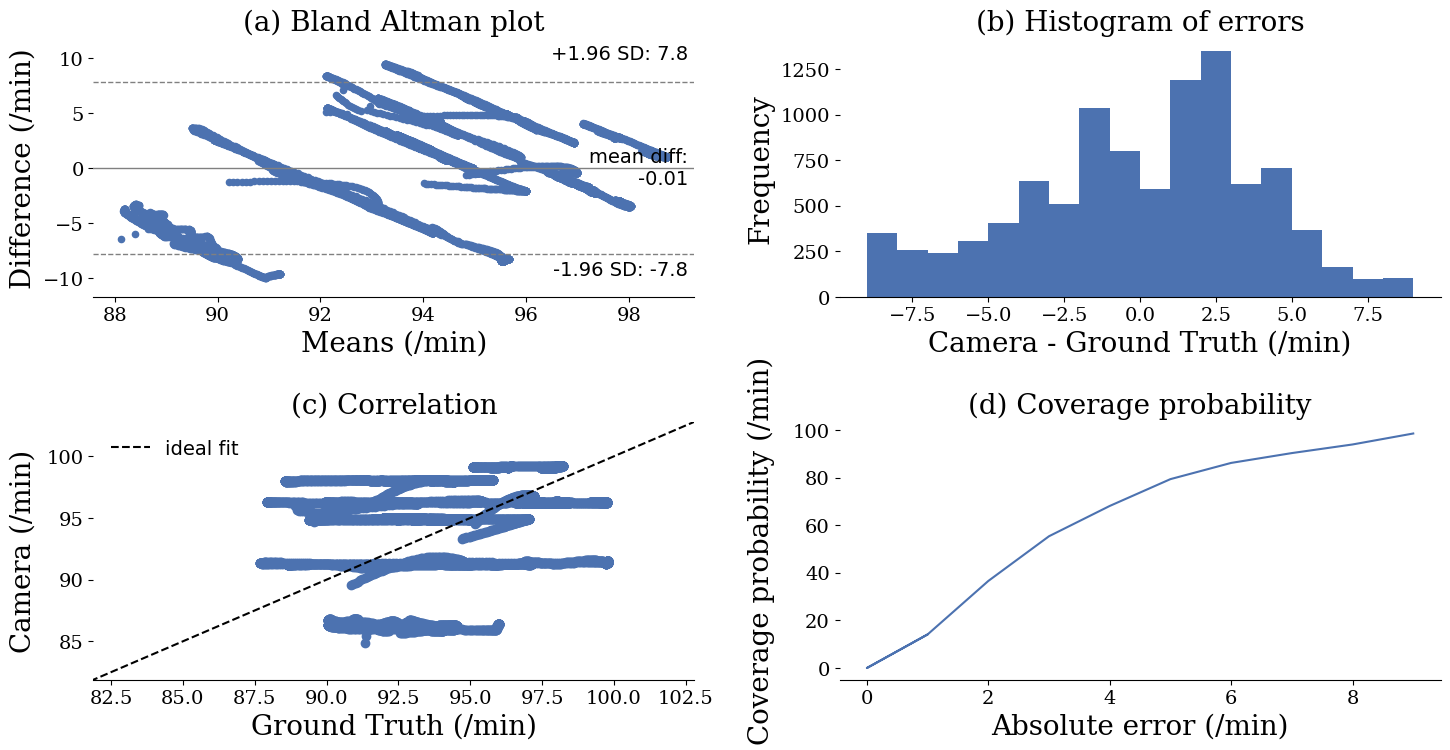

In [4]:
#SummaryStatistics.vital_sign_summary_statistics(database_path, "calibration_free_oxygen_saturation")
SummaryStatistics.vital_sign_summary_statistics(database_path, "infrared_oxygen_saturation")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "ycgcr_oxygen_saturation")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "rgb_oxygen_saturation")

# Summary statistics respiratory rate and volume

Number of subjects:  3
Resp_Fourier
CP 10 %: 0.623574144486692
CP 20 %: 0.9251901140684411
MAD: 4.773050785770025
MAD: 8.488193377171257 %
MSE: 37.721020212181465


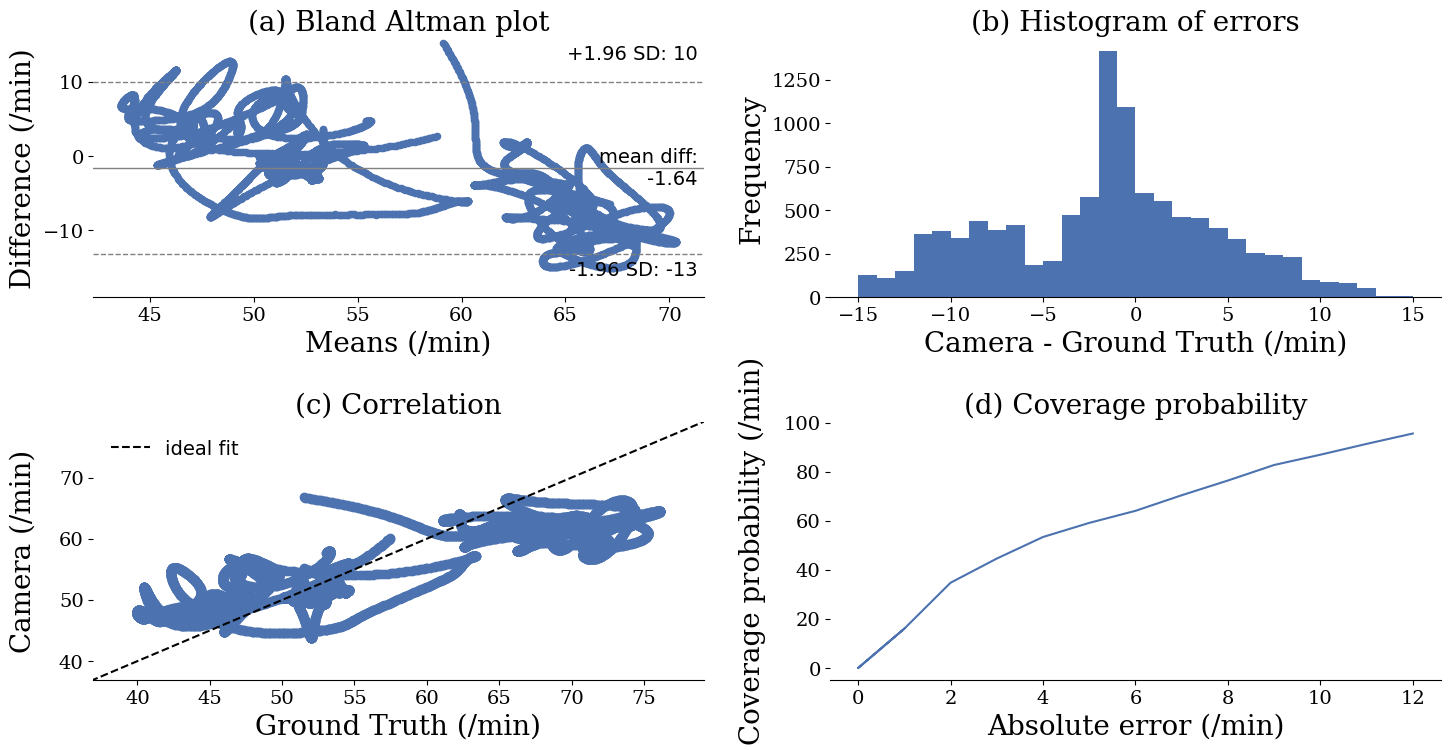

Number of subjects:  3
Tidal_volume_upper_lower
CP 10 %: 0.5534220532319392
CP 20 %: 0.7488593155893536
MAD: 0.581498587769062
MAD: 12.339768497365718 %
MSE: 0.5867421544495403


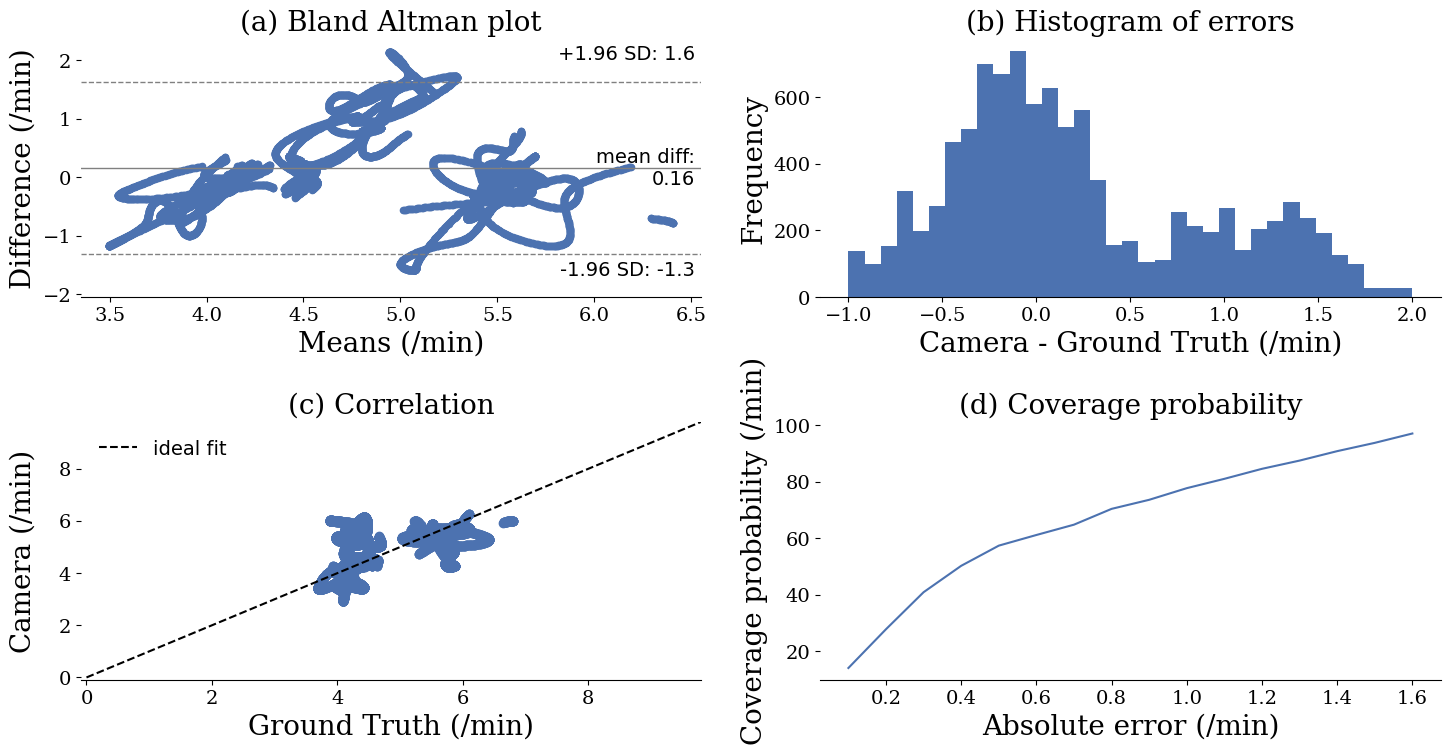

In [5]:
SummaryStatistics.vital_sign_summary_statistics(database_path, "Resp_Fourier")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "Resp_Peak_counting")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "Tidal_volume")
SummaryStatistics.vital_sign_summary_statistics(database_path, "Tidal_volume_upper_lower")